# Fantasy Basketball Cap Space Rankings

The challenge of cap space fantasy basketball leagues is to fit as much value as possible within the given salary constraint of the league. This notebook attempts to identify the most valuable players in cap space fantasy basketball given salary cap and roster size constraints.

## 1. Imports and Cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
from scipy.optimize import minimize
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

In [2]:
tables = pd.read_html('https://www.basketball-reference.com/leagues/NBA_2024_per_game.html')

In [3]:
df_unfiltered = tables[0]

In [4]:
df_unfiltered.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [5]:
df_unfiltered

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,24,TOR,18,0,18.2,3.2,6.9,...,.621,2.1,4.1,6.2,1.9,0.6,0.4,1.4,1.8,8.0
1,2,Bam Adebayo,C,26,MIA,16,16,33.6,8.3,15.8,...,.813,2.1,7.9,9.9,3.9,1.2,1.0,2.4,2.4,22.3
2,3,Ochai Agbaji,SG,23,UTA,24,10,20.9,2.3,5.4,...,.750,0.9,1.6,2.5,1.1,0.7,0.5,0.7,1.5,6.2
3,4,Santi Aldama,PF,23,MEM,17,5,25.8,4.8,10.9,...,.621,1.5,4.5,6.0,2.2,0.8,0.8,1.1,1.8,12.4
4,5,Nickeil Alexander-Walker,SG,25,MIN,22,11,23.9,2.6,6.4,...,.600,0.5,1.6,2.1,2.6,0.9,0.7,1.2,2.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,492,Thaddeus Young,PF,35,TOR,3,0,3.3,0.7,1.3,...,.000,0.3,0.7,1.0,1.0,0.0,0.0,0.3,0.0,1.3
528,493,Trae Young,PG,25,ATL,21,21,35.8,8.3,20.0,...,.872,0.6,2.1,2.8,10.8,1.4,0.1,4.0,1.6,27.2
529,494,Omer Yurtseven,C,25,UTA,17,6,12.1,1.9,3.6,...,.750,1.6,3.3,4.9,0.7,0.2,0.5,1.0,1.6,4.4
530,495,Cody Zeller,C,31,NOP,20,0,9.5,0.6,1.7,...,.542,1.1,1.8,2.9,1.1,0.2,0.1,0.3,1.2,1.8


In [6]:
df_unfiltered.describe()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,532,532,532,532,532,532,532,532,532,532,...,466,532,532,532,532,532,532,532,532,532
unique,497,497,7,22,32,26,27,256,94,170,...,189,42,80,101,77,23,25,43,40,197
top,Rk,Player,SG,24,Tm,22,0,MP,0.0,FGA,...,1.000,0.0,0.0,TRB,0.0,0.0,0.0,0.0,0.0,PTS
freq,24,24,119,60,24,52,236,24,26,24,...,40,59,30,24,45,73,109,57,32,24


In [7]:
df_unfiltered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rk      532 non-null    object
 1   Player  532 non-null    object
 2   Pos     532 non-null    object
 3   Age     532 non-null    object
 4   Tm      532 non-null    object
 5   G       532 non-null    object
 6   GS      532 non-null    object
 7   MP      532 non-null    object
 8   FG      532 non-null    object
 9   FGA     532 non-null    object
 10  FG%     523 non-null    object
 11  3P      532 non-null    object
 12  3PA     532 non-null    object
 13  3P%     478 non-null    object
 14  2P      532 non-null    object
 15  2PA     532 non-null    object
 16  2P%     513 non-null    object
 17  eFG%    523 non-null    object
 18  FT      532 non-null    object
 19  FTA     532 non-null    object
 20  FT%     466 non-null    object
 21  ORB     532 non-null    object
 22  DRB     532 non-null    ob

In [8]:
df_filtered = df_unfiltered[df_unfiltered['Rk']!='Rk']

In [9]:
df_filtered[['PTS', '3P', 'TRB', 'AST', 'STL', 'BLK', 'FG%', 'FGA', 'FT%','FTA', 'TOV','MP','G']] = df_filtered[['PTS', '3P', 'TRB', 'AST', 'STL', 'BLK', 'FG%', 'FGA', 'FT%','FTA', 'TOV','MP','G']].astype(float)

C:\Users\Hendricks\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [10]:
# I only rank players that play at least 20 minutes a game and have played at least 8 games.

df = df_filtered.loc[(df_filtered['MP'] >= 20) & (df_filtered['G'] >= 10)]

In [11]:
df

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,2,Bam Adebayo,C,26,MIA,16.0,16,33.6,8.3,15.8,...,0.813,2.1,7.9,9.9,3.9,1.2,1.0,2.4,2.4,22.3
2,3,Ochai Agbaji,SG,23,UTA,24.0,10,20.9,2.3,5.4,...,0.750,0.9,1.6,2.5,1.1,0.7,0.5,0.7,1.5,6.2
3,4,Santi Aldama,PF,23,MEM,17.0,5,25.8,4.8,10.9,...,0.621,1.5,4.5,6.0,2.2,0.8,0.8,1.1,1.8,12.4
4,5,Nickeil Alexander-Walker,SG,25,MIN,22.0,11,23.9,2.6,6.4,...,0.600,0.5,1.6,2.1,2.6,0.9,0.7,1.2,2.0,7.0
5,6,Grayson Allen,SG,28,PHO,19.0,19,33.1,4.1,8.5,...,0.895,0.7,3.8,4.5,2.9,0.7,0.4,1.5,2.3,12.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,482,Patrick Williams,PF,22,CHI,25.0,15,26.1,3.2,7.6,...,0.714,1.2,3.0,4.2,1.3,1.0,0.9,1.2,1.7,8.8
520,485,Ziaire Williams,SF,22,MEM,21.0,8,20.3,2.7,7.1,...,0.889,0.6,3.4,4.0,1.3,0.5,0.2,1.1,1.8,7.7
521,486,Zion Williamson,PF,23,NOP,20.0,20,31.0,9.0,15.4,...,0.658,1.9,3.7,5.6,4.7,1.1,0.3,2.7,2.5,22.9
528,493,Trae Young,PG,25,ATL,21.0,21,35.8,8.3,20.0,...,0.872,0.6,2.1,2.8,10.8,1.4,0.1,4.0,1.6,27.2


In [12]:
df = df.reset_index(drop=True)

In [13]:
pt = PowerTransformer()

In [14]:
transformed_features = pt.fit_transform(df[['PTS', '3P', 'TRB', 'AST', 'STL', 'BLK', 'FG%', 'FGA', 'FT%','FTA', 'TOV']])

In [15]:
ss = StandardScaler()

In [16]:
scaled_features = ss.fit_transform(transformed_features)

In [17]:
scaled_df = pd.DataFrame(scaled_features,columns=['PZ', '3Z', 'RZ', 'AZ', 'SZ', 'BZ', 'FG%Z', 'FGAZ', 'FT%Z','FTAZ', 'TZ'])

In [18]:
df = pd.concat([df, scaled_df], axis=1)

In [19]:
df

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,3Z,RZ,AZ,SZ,BZ,FG%Z,FGAZ,FT%Z,FTAZ,TZ
0,2,Bam Adebayo,C,26,MIA,16.0,16,33.6,8.3,15.8,...,-1.757229,1.625722,0.573765,0.909248,1.041329,0.820711,1.028075,0.214127,1.629926,0.964856
1,3,Ochai Agbaji,SG,23,UTA,24.0,10,20.9,2.3,5.4,...,-0.253615,-1.383919,-1.364903,-0.453248,0.082518,-0.669062,-1.473092,-0.436931,-2.141737,-1.427911
2,4,Santi Aldama,PF,23,MEM,17.0,5,25.8,4.8,10.9,...,0.073242,0.583235,-0.353250,-0.133871,0.734348,-0.469469,0.084558,-1.413560,-0.504448,-0.630027
3,5,Nickeil Alexander-Walker,SG,25,MIN,22.0,11,23.9,2.6,6.4,...,-0.034146,-1.776580,-0.087708,0.158901,0.547717,-1.263357,-1.123778,-1.535379,-1.520563,-0.462884
4,6,Grayson Allen,SG,28,PHO,19.0,19,33.1,4.1,8.5,...,0.787871,-0.051242,0.088628,-0.453248,-0.211254,0.233489,-0.501139,1.279158,-0.282398,-0.018642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,482,Patrick Williams,PF,22,CHI,25.0,15,26.1,3.2,7.6,...,-0.479971,-0.206119,-1.137913,0.428517,0.897569,-0.815113,-0.752539,-0.753378,-0.504448,-0.462884
215,485,Ziaire Williams,SF,22,MEM,21.0,8,20.3,2.7,7.1,...,-0.479971,-0.316117,-1.137913,-1.189639,-0.980642,-1.788391,-0.901698,1.191847,-0.848944,-0.630027
216,486,Zion Williamson,PF,23,NOP,20.0,20,31.0,9.0,15.4,...,-1.757229,0.433013,0.881244,0.677836,-0.560318,1.512233,0.960239,-1.175809,1.696546,1.215605
217,493,Trae Young,PG,25,ATL,21.0,21,35.8,8.3,20.0,...,1.450244,-1.126558,2.217977,1.326111,-1.494710,-0.966636,1.670278,0.952911,1.956414,2.045318


In [20]:
df['TZ'] = df['TZ'] * -1

In [21]:
mm = MinMaxScaler()

In [22]:
data_2d = df['FTAZ'].values.reshape(-1, 1)
df['FTAZ'] = mm.fit_transform(data_2d)

In [23]:
data_2d = df['FGAZ'].values.reshape(-1, 1)
df['FGAZ'] = mm.fit_transform(data_2d)

In [24]:
# Calculating % stats z scores

df['FTZ'] = stats.zscore(df['FT%Z']*df['FTAZ'])
df['FGZ'] = stats.zscore(df['FG%Z']*df['FGAZ'])

In [25]:
cols_to_sum = ['PZ', '3Z', 'RZ', 'AZ', 'SZ', 'BZ','FTZ', 'FGZ','TZ']

In [26]:
# Calculating overall value

df['val'] = df[cols_to_sum].mean(axis=1)

In [27]:
# Scaling overall value to all positives

scaler = MinMaxScaler()
df['posval'] = scaler.fit_transform(df[['val']])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 45 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      219 non-null    object 
 1   Player  219 non-null    object 
 2   Pos     219 non-null    object 
 3   Age     219 non-null    object 
 4   Tm      219 non-null    object 
 5   G       219 non-null    float64
 6   GS      219 non-null    object 
 7   MP      219 non-null    float64
 8   FG      219 non-null    object 
 9   FGA     219 non-null    float64
 10  FG%     219 non-null    float64
 11  3P      219 non-null    float64
 12  3PA     219 non-null    object 
 13  3P%     207 non-null    object 
 14  2P      219 non-null    object 
 15  2PA     219 non-null    object 
 16  2P%     219 non-null    object 
 17  eFG%    219 non-null    object 
 18  FT      219 non-null    object 
 19  FTA     219 non-null    float64
 20  FT%     219 non-null    float64
 21  ORB     219 non-null    object 
 22  DR

In [29]:
sals = pd.read_html('https://www.basketball-reference.com/contracts/players.html')

In [30]:
sal_df = sals[0]

In [31]:
sal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   (Unnamed: 0_level_0, Rk)          499 non-null    object
 1   (Unnamed: 1_level_0, Player)      499 non-null    object
 2   (Unnamed: 2_level_0, Tm)          499 non-null    object
 3   (Salary, 2023-24)                 521 non-null    object
 4   (Salary, 2024-25)                 379 non-null    object
 5   (Salary, 2025-26)                 251 non-null    object
 6   (Salary, 2026-27)                 151 non-null    object
 7   (Salary, 2027-28)                 74 non-null     object
 8   (Salary, 2028-29)                 54 non-null     object
 9   (Unnamed: 9_level_0, Guaranteed)  476 non-null    object
dtypes: object(10)
memory usage: 40.9+ KB


In [32]:
sal_df.columns=['Rk','Player','Tm','2023-24','2024-25','2025-26','2026-27','2027-28','2028-29','Guaranteed']

In [33]:
df = df.merge(sal_df,how='left',left_on= 'Player', right_on = 'Player')

In [34]:
df['Salary'] = df['2023-24']

In [35]:
df['Salary'].head()

0    $32,600,060
1     $4,114,200
2     $2,194,200
3     $4,687,500
4     $8,925,000
Name: Salary, dtype: object

In [36]:
df['Salary'] = df['Salary'].str[1:]

In [37]:
df['Salary'] = df['Salary'].str.replace(',','')

In [38]:
df[df['Salary'].isna()]

,Rk_x,Player,Pos,Age,Tm_x,G,GS,MP,FG,FGA,...,Rk_y,Tm_y,2023-24,2024-25,2025-26,2026-27,2027-28,2028-29,Guaranteed,Salary
174,385,Matt Ryan,SF,26,NOP,13.0,1,22.9,2.9,6.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
df['Salary'] = df['Salary'].fillna(1119563)

In [40]:
df['Salary'] = df['Salary'].astype(int)

In [41]:
df[df['Salary']<1119563] = 1119563

## EDA

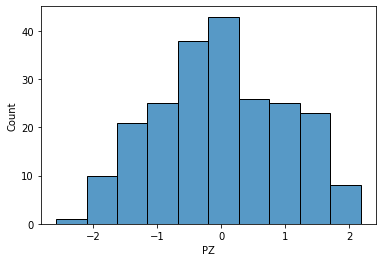

In [43]:
sns.histplot(x='PZ',bins=10,data=df);

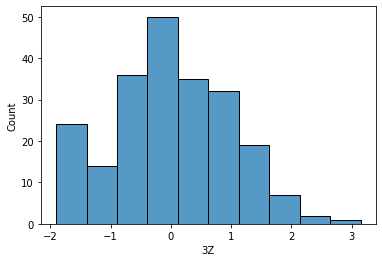

In [44]:
sns.histplot(x='3Z',bins=10,data=df);

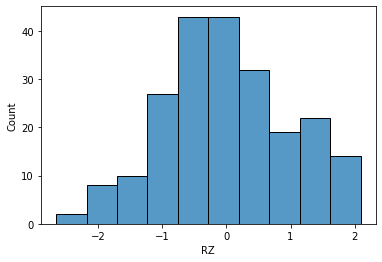

In [45]:
sns.histplot(x='RZ',bins=10,data=df);

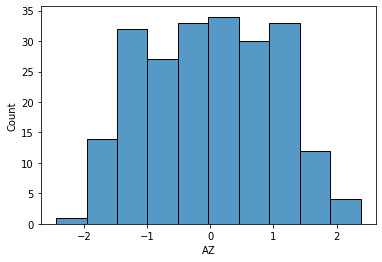

In [46]:
sns.histplot(x='AZ',bins=10,data=df);

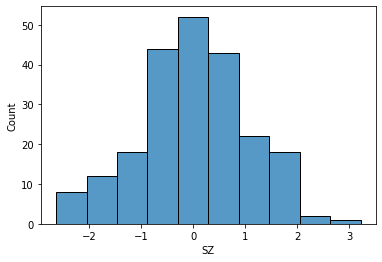

In [47]:
sns.histplot(x='SZ',bins=10,data=df);

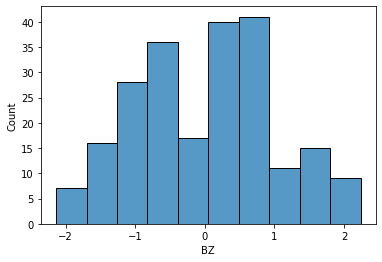

In [48]:
sns.histplot(x='BZ',bins=10,data=df);

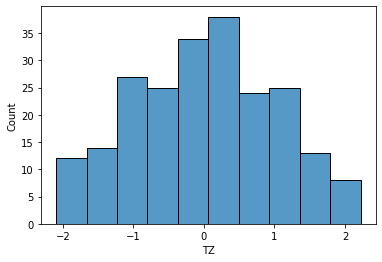

In [49]:
sns.histplot(x='TZ',bins=10,data=df);

## Optimize

In [50]:
cols = ['Player', 'Salary', 'val']
players_df = df[cols]
players_df.reset_index(inplace=True,drop=True)

In [51]:
players_df.sort_values(by='val',ascending=False)

,Player,Salary,val
68,Shai Gilgeous-Alexander,33386850,1.301923
60,Joel Embiid,47607350,1.044035
78,Tyrese Haliburton,5808435,0.949475
57,Kevin Durant,47649433,0.853282
119,Kawhi Leonard,45640084,0.825498
...,...,...,...
76,Quentin Grimes,2385720,-0.779706
26,Malaki Branham,3071880,-0.786684
211,Andrew Wiggins,24330357,-0.945195
88,Scoot Henderson,9770880,-1.073288


In [52]:
budget = 185000000
roster_size = 12

In [53]:
def optimize_team(players_df, budget, roster_size):
    def objective_function(selection):
        total_value = selection @ players_df['val']
        return -total_value
    
    budget_constraint = {
    'type': 'ineq',
    'fun': lambda selection: budget - np.sum(selection * players_df['Salary'])
    }
    
    roster_size_constraint = {
    'type': 'eq',
    'fun': lambda selection: roster_size - np.sum(selection)
    }
    
    initial_selection = np.zeros(len(players_df))
    
    bounds = [(0, 1)] * len(players_df)
    
    result = minimize(objective_function, initial_selection, method='SLSQP', 
                  constraints=[budget_constraint, roster_size_constraint], bounds=bounds)
    
    optimal_selection = players_df[result.x > 0.5]
    total_value = -result.fun
    
    return optimal_selection, total_value

In [54]:
optimal_selection1, total_value1 = optimize_team(players_df, budget, roster_size)

In [55]:
print("Optimal player selection (Round 1):")
print(optimal_selection1)
print("Maximum total value (Round 1):", total_value1)

Optimal player selection (Round 1):
                      Player    Salary       val
12               LaMelo Ball  10900635  0.484055
14              Desmond Bane   3845083  0.611414
16            Scottie Barnes   8008680  0.683914
29             Miles Bridges   7921300  0.463281
60               Joel Embiid  47607350  1.044035
68   Shai Gilgeous-Alexander  33386850  1.301923
78         Tyrese Haliburton   5808435  0.949475
92             Chet Holmgren  10386000  0.620007
106            Jalen Johnson   2925360  0.306476
128          Lauri Markkanen  17259999  0.631911
132             Tyrese Maxey   4343920  0.713027
138         Donovan Mitchell  33162030  0.711509
Maximum total value (Round 1): 8.513467709748733


In [56]:
players_df = players_df[~players_df['Player'].isin(optimal_selection1['Player'])]
optimal_selection2, total_value2 = optimize_team(players_df, budget, roster_size)
print("\nOptimal player selection (Round 2):")
print(optimal_selection2)
print("Maximum total value (Round 2):", total_value2)


Optimal player selection (Round 2):
                Player    Salary       val
24   Bogdan Bogdanović  18700000  0.418369
25        Devin Booker  36016200  0.720834
28       Mikal Bridges  21700000  0.481449
59     Anthony Edwards  13534817  0.430517
111      Herbert Jones  12015150  0.415370
139        Evan Mobley   8882640  0.287080
172       Terry Rozier  23205221  0.536778
178     Alperen Şengün   3536280  0.228282
203       Franz Wagner   5508720  0.203085
207  Victor Wembanyama  12160680  0.320942
210      Derrick White  18357143  0.510115
213     Jalen Williams   4558680  0.186316
Maximum total value (Round 2): 4.85198936457833


In [57]:
players_df = players_df[~players_df['Player'].isin(optimal_selection2['Player'])]
optimal_selection3, total_value3 = optimize_team(players_df, budget, roster_size)
print("\nOptimal player selection (Round 3):")
print(optimal_selection3)
print("Maximum total value (Round 3):", total_value3)


Optimal player selection (Round 3):
                Player    Salary       val
4        Grayson Allen   8925000  0.135182
20       Malik Beasley   2019706  0.107895
51       Anthony Davis  40600080  0.724871
55         Luka Dončić  40064220  0.771667
71         Eric Gordon   3196448  0.014322
119      Kawhi Leonard  45640084  0.825498
135  De'Anthony Melton   8000000  0.130583
141    Dejounte Murray  18214000  0.367406
152    Kelly Oubre Jr.   2019706  0.058595
187        Jalen Suggs   7252080  0.113556
189         Cam Thomas   2240160  0.016258
214      Mark Williams   3908160  0.114123
Maximum total value (Round 3): 3.4350723597697495


In [58]:
players_df = players_df[~players_df['Player'].isin(optimal_selection3['Player'])]
optimal_selection4, total_value4 = optimize_team(players_df, budget, roster_size)
print("\nOptimal player selection (Round 4):")
print(optimal_selection4)
print("Maximum total value (Round 4):", total_value4)


Optimal player selection (Round 4):
                 Player    Salary       val
2          Santi Aldama   2194200 -0.041223
10          Deni Avdija   6263188  0.069501
21           Saddiq Bey   4556983  0.033678
41          Nic Claxton   9625000  0.114280
57         Kevin Durant  47649433  0.853282
108        Nikola Jokić  47607350  0.820304
143       Keegan Murray   8409000  0.095044
176         Dario Šarić   2019706 -0.049889
180      Shaedon Sharpe   6313800  0.049296
195  Karl-Anthony Towns  36016200  0.597929
198   Jonas Valančiūnas  15435000  0.229242
209          Coby White  11111111  0.136404
Maximum total value (Round 4): 2.673245889637958


In [59]:
players_df = players_df[~players_df['Player'].isin(optimal_selection4['Player'])]
optimal_selection5, total_value5 = optimize_team(players_df, budget, roster_size)
print("\nOptimal player selection (Round 5):")
print(optimal_selection5)
print("Maximum total value (Round 5):", total_value5)


Optimal player selection (Round 5):
               Player    Salary       val
8        Cole Anthony   5539771  0.008927
22       Goga Bitadze   2066585 -0.100590
39        Alex Caruso   9460000  0.071848
103  Jaime Jaquez Jr.   3510600 -0.068661
107    Keldon Johnson  20000000  0.255160
133       CJ McCollum  35802469  0.588431
147     Royce O'Neale   9500000  0.069071
183  Jabari Smith Jr.   9326520  0.084503
186         Max Strus  14487684  0.182023
188      Jayson Tatum  32600060  0.519794
197      Myles Turner  20975000  0.270434
201    Nikola Vučević  18518519  0.245024
Maximum total value (Round 5): 2.1884475008806934


In [60]:
players_df = players_df[~players_df['Player'].isin(optimal_selection5['Player'])]
optimal_selection6, total_value6 = optimize_team(players_df, budget, roster_size)
print("\nOptimal player selection (Round 6):")
print(optimal_selection6)
print("Maximum total value (Round 6):", total_value6)


Optimal player selection (Round 6):
             Player    Salary       val
0       Bam Adebayo  32600060  0.471094
13   Paolo Banchero  11608080  0.049068
58      Jalen Duren   4330680 -0.073051
80     James Harden  35640000  0.552344
93       Al Horford  10000000  0.045691
98     Kyrie Irving  37037037  0.577619
104      Isaiah Joe   1997238 -0.122940
125     Brook Lopez  25000000  0.336823
129   Naji Marshall   1930681 -0.151154
140      Malik Monk   9945830  0.034680
194      Obi Toppin   6803012 -0.044515
200   Devin Vassell   5887899 -0.036019
Maximum total value (Round 6): 1.6843224326703146


In [61]:
players_df = players_df[~players_df['Player'].isin(optimal_selection6['Player'])]
optimal_selection7, total_value7 = optimize_team(players_df, budget, roster_size)
print("\nOptimal player selection (Round 7):")
print(optimal_selection7)
print("Maximum total value (Round 7):", total_value7)


Optimal player selection (Round 7):
                  Player    Salary       val
9             OG Anunoby  18642857  0.185293
43          Zach Collins   7700000 -0.063282
61   Dorian Finney-Smith  13932008  0.053758
66           Paul George  45640084  0.661833
84            Sam Hauser   1927896 -0.157488
144        Aaron Nesmith   5634257 -0.108340
146         Jusuf Nurkić  16875000  0.118024
149       Onyeka Okongwu   8109063 -0.050671
158   Kristaps Porziņģis  36016200  0.508724
164        Austin Reaves  12015150  0.024785
166             Naz Reid  12950400  0.043497
190       Ausar Thompson   7977480 -0.051523
Maximum total value (Round 7): 1.117593178930999


In [62]:
players_df = players_df[~players_df['Player'].isin(optimal_selection7['Player'])]
optimal_selection8, total_value8 = optimize_team(players_df, budget, roster_size)
print("\nOptimal player selection (Round 8):")
print(optimal_selection8)
print("Maximum total value (Round 8):", total_value8)


Optimal player selection (Round 8):
                    Player    Salary       val
7    Giannis Antetokounmpo  45640084  0.640927
48         Cade Cunningham  11055360 -0.033815
62            De'Aaron Fox  32600060  0.387520
63          Daniel Gafford  12402000 -0.027244
100      Jaren Jackson Jr.  27102202  0.275866
113             Tyus Jones  14000000  0.002820
122       Dereck Lively II   4775640 -0.131948
137         Brandon Miller  10880400 -0.059044
162      Immanuel Quickley   4171548 -0.171770
168        Josh Richardson   2891467 -0.210568
173       D'Angelo Russell  17307693  0.107698
204       Lonnie Walker IV   2019706 -0.202449
Maximum total value (Round 8): 0.5810186467765737
